In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import rpy2

In [2]:
%load_ext rpy2.ipython

In [3]:
def get_total_normalized(set1, set2):
    total = set1 + set2
    return total/total.sum(), total.sum()

def create_dataframe(sets, labels):
    dfs = []
    for idx, single_set in enumerate(sets):
        df =  pd.DataFrame({"Id": [1,2,3],
                   "Público": [labels[idx]]*3,
                   "Porcentagem": [round(single_set[:2].sum(),2), 
                                   round(single_set[2],2), 
                                   round(single_set[3:].sum(),2)],
                   "Percepção": ["Discordam", "Neutro", "Concordam"]})
        dfs.append(df)
    df_total = pd.concat(dfs, axis=0)
    return df_total

In [172]:
%%R

plot_likert <- function(df, fig_name, height=1.4){ 
    
    df$Percepção <- reorder(df$Percepção, -df$Id)

    p<-ggplot(df, aes(fill=Percepção, y=Porcentagem, x=Público)) + 
        geom_bar(position='stack', stat='identity') + coord_flip() +
        geom_text(aes(label = paste0(Porcentagem*100,"%")), 
                  position = position_stack(vjust = 0.5), color='white', size=8) +
        theme_minimal() + scale_fill_manual(values = c("#00BA38","#619CFF", "#F8766D")) +
        theme(axis.text=element_text(size=11),
              axis.title=element_text(size=11,face="bold"))
    # ggplot_build(p)$data
    ggsave(file=fig_name, width=8, height=height, dpi=300)
    p
}

## Alunos
### Pergunta: A interface do dashboard me ajudou a organizar o tempo de estudo

In [153]:
alunos_2020_1 = np.array([46, 32, 61, 19, 19])
alunos_2020_2 = np.array([28, 18, 24, 12, 7])

alunos_total_norm, alunos_total = get_total_normalized(alunos_2020_1, alunos_2020_2)
alunos_total_norm

array([0.27819549, 0.18796992, 0.31954887, 0.11654135, 0.09774436])

In [154]:
alunos_total

266

## Professores

### Pergunta: O uso do sistema me ajudou a ter uma visão melhor do esforço e/ou tempo que os alunos gastam para fazer os exercícios

In [155]:
professores_2020_1 = np.array([0, 1, 2, 2, 1])
professores_2020_2 = np.array([0, 1, 1, 2, 0])

professores_total_norm, professores_total = get_total_normalized(professores_2020_1, professores_2020_2)
professores_total_norm

array([0. , 0.2, 0.3, 0.4, 0.1])

In [157]:
df = create_dataframe([alunos_total_norm, professores_total_norm], ["Aluno", "Professor"])
df

,Id,Público,Porcentagem,Percepção
0,1,Aluno,0.47,Discordam
1,2,Aluno,0.32,Neutro
2,3,Aluno,0.21,Concordam
0,1,Professor,0.20,Discordam
1,2,Professor,0.30,Neutro
2,3,Professor,0.50,Concordam


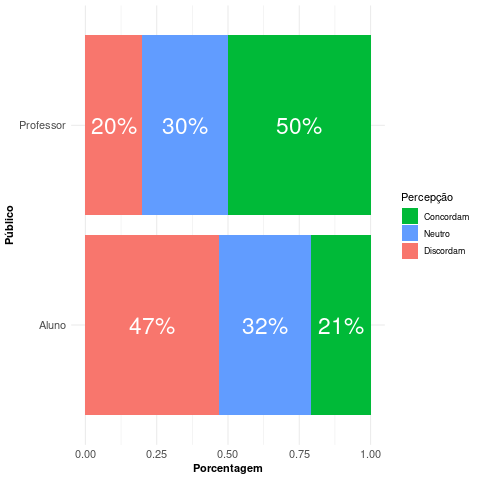

In [158]:
%%R -i df
plot_likert(df, "percepcao_alunos_e_prof_tempo.png")

## Alunos
### Pergunta: A indicação dos principais erros no dashboard me ajudou a direcionar o estudo

In [199]:
alunos_2020_1 = np.array([32, 19, 47, 39, 40])
alunos_2020_2 = np.array([18, 13, 26, 21, 12])

alunos_total_norm, alunos_total = get_total_normalized(alunos_2020_1, alunos_2020_2)
alunos_total_norm

array([0.18726592, 0.11985019, 0.27340824, 0.2247191 , 0.19475655])

In [179]:
alunos_total

267

## Professores

### Pergunta: O uso do sistema me ajudou a identificar conteúdos que são mais difíceis para os alunos

In [180]:
professores_2020_1 = np.array([0, 2, 3, 1, 0])
professores_2020_2 = np.array([0, 0, 1, 2, 1])

professores_total_norm, professores_total = get_total_normalized(professores_2020_1, professores_2020_2)
professores_total_norm

array([0. , 0.2, 0.4, 0.3, 0.1])

In [181]:
professores_total

10

In [182]:
df = create_dataframe([alunos_total_norm, professores_total_norm], ["Aluno", "Professor"])
df

,Id,Público,Porcentagem,Percepção
0,1,Aluno,0.31,Discordam
1,2,Aluno,0.27,Neutro
2,3,Aluno,0.42,Concordam
0,1,Professor,0.20,Discordam
1,2,Professor,0.40,Neutro
2,3,Professor,0.40,Concordam


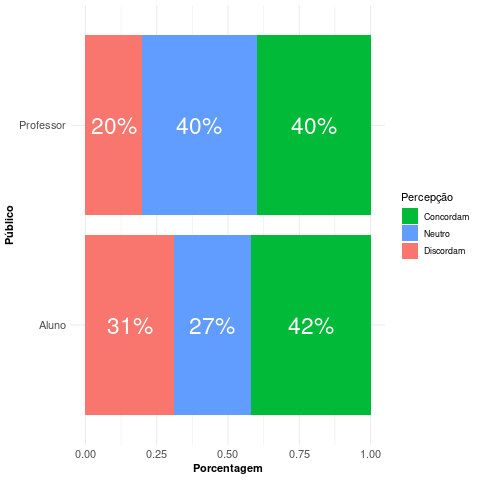

In [184]:
%%R -i df
plot_likert(df, "percepcao_alunos_e_prof_conteudo.png")

In [185]:
professores_2020_1_norm, professores_2020_1_norm_total = get_total_normalized(professores_2020_1, np.zeros(5))
professores_2020_2_norm, professores_2020_2_norm_total = get_total_normalized(professores_2020_2, np.zeros(5))

In [186]:
professores_2020_1_norm

array([0.        , 0.33333333, 0.5       , 0.16666667, 0.        ])

In [187]:
professores_2020_2_norm

array([0.  , 0.  , 0.25, 0.5 , 0.25])

In [188]:
df = create_dataframe([alunos_total_norm, professores_2020_1_norm, professores_2020_2_norm], ["Aluno", 
                                                                                              "Professor 2020/1",
                                                                                              "Professor 2020/2"])
df.replace(0, np.nan, inplace=True)
df

,Id,Público,Porcentagem,Percepção
0,1,Aluno,0.31,Discordam
1,2,Aluno,0.27,Neutro
2,3,Aluno,0.42,Concordam
0,1,Professor 2020/1,0.33,Discordam
1,2,Professor 2020/1,0.50,Neutro
2,3,Professor 2020/1,0.17,Concordam
0,1,Professor 2020/2,NaN,Discordam
1,2,Professor 2020/2,0.25,Neutro
2,3,Professor 2020/2,0.75,Concordam


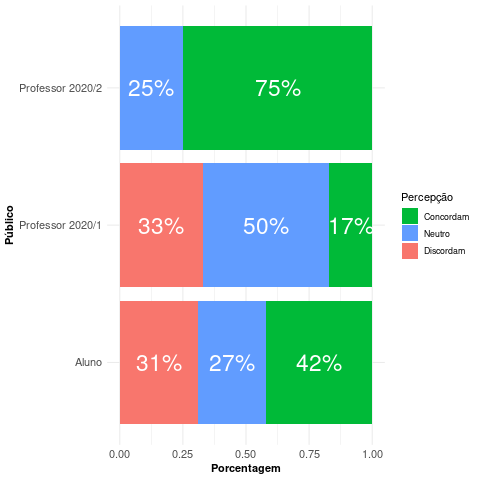

In [189]:
%%R -i df
plot_likert(df, "percepcao_alunos_e_prof_conteudo2.png", height=1.6)

## Professores

### Pergunta: O uso do sistema me motivou a ajustar o plano de aula ou as atividades didáticas

In [190]:
professores_2020_1 = np.array([0, 1, 4, 1, 0])
professores_2020_2 = np.array([1, 0, 2, 1, 0])

professores_total_norm, professores_total = get_total_normalized(professores_2020_1, professores_2020_2)
professores_total_norm

array([0.1, 0.1, 0.6, 0.2, 0. ])

In [192]:
df = create_dataframe([alunos_total_norm, professores_total_norm], ["Aluno", "Professor"])
df

,Id,Público,Porcentagem,Percepção
0,1,Aluno,0.31,Discordam
1,2,Aluno,0.27,Neutro
2,3,Aluno,0.42,Concordam
0,1,Professor,0.20,Discordam
1,2,Professor,0.60,Neutro
2,3,Professor,0.20,Concordam


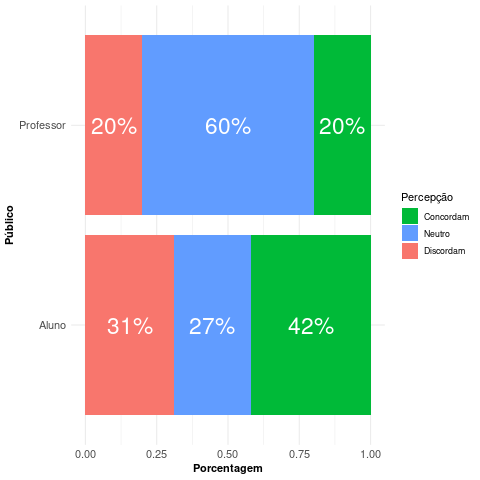

In [193]:
%%R -i df
plot_likert(df, "percepcao_alunos_e_prof_plano_de_aula.png")

### Total de Alunos

In [8]:
professores = Professor.objects.filter(assistant=False).values_list('user')
professores.count()

30

In [10]:
users = UserProfile.objects.exclude(user__in=professores)
users.count()

1609

In [19]:
users.order_by('user__date_joined')[4].user.date_joined

datetime.datetime(2018, 10, 22, 22, 19, 8, 483432, tzinfo=<UTC>)

In [20]:
UserLog.objects.count()

284420